In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv


**CardioGood Fitness Data Analysis- Problem Statement**

As a member of the market research team at AdRight, I've been tasked with developing a comprehensive customer profile for each treadmill product offered by CardioGood Fitness. This analysis aims to identify distinct characteristics and preferences among customers who purchase different treadmill models. To achieve this, I will be collecting data from individuals who have purchased a treadmill at a CardioGood Fitness retail store within the past three months. To do so, I will perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

**Data Dictionary**

The team identified the following customer variables to study:

**Product**- Product purchased - TM195, TM498, or TM798

**Gender**- Male or Female

**Age**- Age of the customer in years

**Education**- Education of the customer in years

**MaritalStatus**- Single or partnered

**Income**- Annual household income

**Usage**- The average number of times the customer plans to use the treadmill each week

**Miles**- The average number of miles the customer expects to walk/run each week

**Fitness**- Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

In [2]:
# Import all necessary libraries and packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df= pd.read_csv('/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv')

In [4]:
# Explore the data
print(f'Shape of the data: {df.shape}')

Shape of the data: (180, 9)


In [5]:
# Explore the data
print(f'Columns in the data: {df.columns}')

Columns in the data: Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [6]:
# Explore the data 
print(f'Data types: {df.dtypes}')

Data types: Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [7]:
# Explore the data
print(df.describe(include= 'all'))

       Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      TM195         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
uni

**Understanding the Data**

This analysis helps in understanding the demographic and usage characteristics of the customers for each treadmill product line, which is essential for developing targeted marketing strategies and customer profiles. The data set consists of 180 observations and the following is a brief summary and analysis of the key statistics of the features: 

**Product**- There are three unique treadmill products (TM195, TM498, TM798) with TM195 being the most frequently purchased (80 occurrences).

**Age**- The customers' ages range from 18 to 50 years, with an average age of approximately 28.8 years and a standard deviation of 6.94 years, indicating a relatively young customer base.

**Gender**- The majority of the customers are male (104 out of 180, which is approximately 58%).

**Education**- The average education level is about 15.6 years, with most customers having between 14 and 16 years of education.

**Marital Status**- Most customers are partnered (107 out of 180, which is approximately 60%).

**Usage**- Customers plan to use the treadmill on average 3.46 times per week, with a minimum of 2 and a maximum of 7 times.

**Fitness**- Self-rated fitness levels average at 3.31 on a scale of 1 to 5, indicating moderate fitness levels.

**Income**- Annual household incomes range from 29,562-104,581 dollars, with an average of approximately 53,720 dollars and a standard deviation of 16,507 dollars. 

**Miles**- Customers expect to walk or run an average of 103.2 miles per week, with a wide range from 21 to 360 miles, indicating varied usage patterns.

In [8]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
# View the data
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


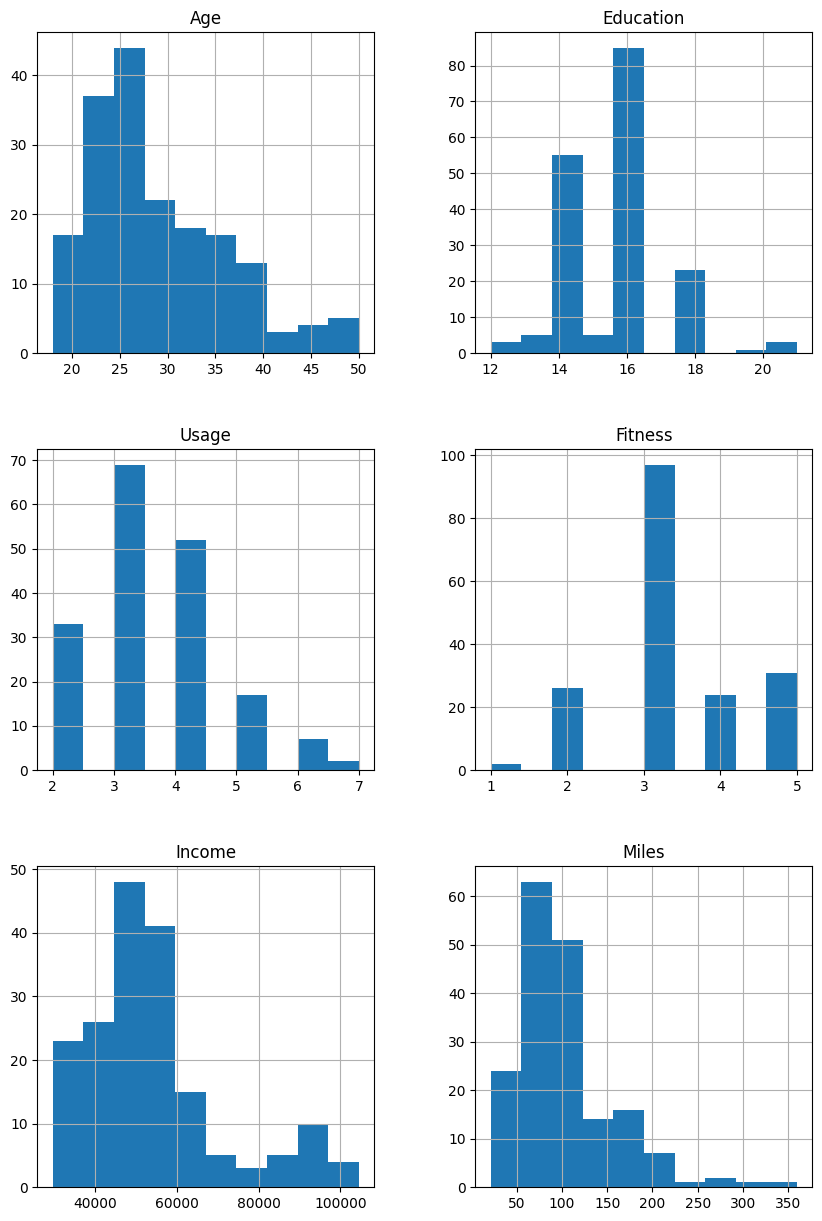

In [10]:
# Histogram of the features
df.hist(figsize= (10,15))
plt.show()

**Histogram of the Features**

1. **Age**- Most customers are between 20 and 35 years old, with a peak around the mid-20s. There are fewer customers above 40 years old, indicating a younger customer base.

2. **Education**- The majority of customers have 16 years of education, corresponding to a college degree. There are smaller peaks at 14 years (high school) and 18 years (graduate school), indicating varied educational backgrounds.

3. **Usage**- Most customers plan to use the treadmill 3 to 4 times per week, with a peak at 3 times. Usage beyond 5 times per week is less common.

4. **Fitness**- The self-rated fitness levels show a peak at 3 on a scale of 1 to 5, indicating moderate fitness. There are fewer customers who rate their fitness at the extreme ends (1 or 5).

5. **Income**- The majority of customers have an annual income between 40,000 and 60,000 dollars. There are smaller groups with higher incomes, up to 100,000 dollars, indicating a relatively wide income distribution.

6. **Miles**- Most customers expect to walk or run between 50 and 100 miles per week, with a peak around 60 miles. There are fewer customers expecting to cover more than 150 miles per week.

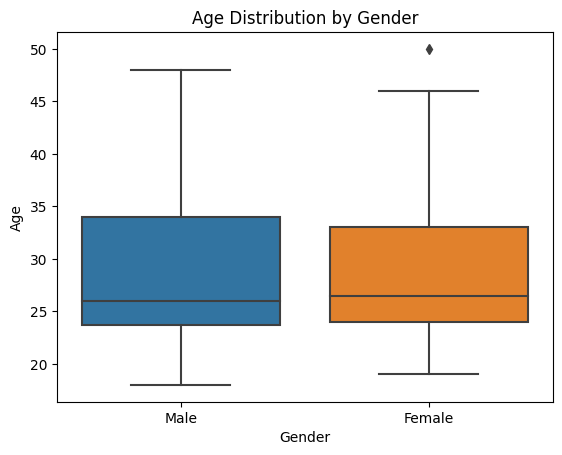

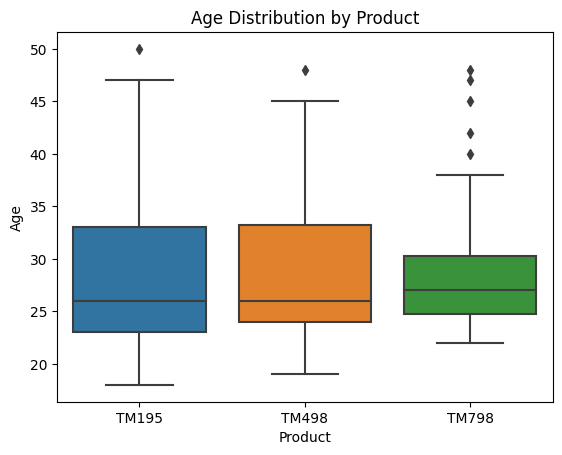

In [11]:
# Boxplots
sns.boxplot(data= df, x= 'Gender', y= 'Age')
plt.title('Age Distribution by Gender')
plt.show()

sns.boxplot(data= df, x= 'Product', y= 'Age')
plt.title('Age Distribution by Product')
plt.show()

**Age Distribution by Gender Boxplot**

The boxplot shows the age distribution of customers by gender. The median age for both males and females is around 26 years. The interquartile range (IQR) for males is 24-33 years, and for females, it is 24-30 years. Males have a wider age range (18-50 years) compared to females (20-43 years). There is one outlier in the female group. Overall, the age distributions for both genders are similar, but males show a broader spread in ages.

**Age Distribution by Product Boxplot**

The boxplot displays the age distribution for each treadmill product (TM195, TM498, TM798). TM195 and TM498 have similar median ages around 30, while TM798 has a lower median age around 25. TM195 and TM498 show a wider age range compared to TM798, which has more outliers indicating variability among older customers. TM798 has the most concentrated age distribution, with many outliers, indicating it's popular among a specific younger age group.



In [12]:
# Crosstabs to see the distribution of the categorical values
print(pd.crosstab(df['Product'], df['Gender'], margins= True))
print(pd.crosstab(df['Product'], df['MaritalStatus'], margins= True))

Gender   Female  Male  All
Product                   
TM195        40    40   80
TM498        29    31   60
TM798         7    33   40
All          76   104  180
MaritalStatus  Partnered  Single  All
Product                              
TM195                 48      32   80
TM498                 36      24   60
TM798                 23      17   40
All                  107      73  180


**Cross Tabulation Analysis**

The crosstabs show the distribution of treadmill product purchases by gender and marital status. For gender, TM195 is equally popular among males and females (40 each). TM498 has a slightly higher number of males (31) than females (29). TM798 is predominantly purchased by males (33) compared to females (7). Overall, more males (104) have purchased treadmills than females (76).

Regarding marital status, TM195 is favored by both partnered (48) and single (32) customers. TM498 has more partnered (36) than single (24) customers. TM798 also has more partnered (23) than single (17) customers. Across all products, there are more partnered customers (107) than single ones (73), indicating a preference for treadmill purchases among partnered individuals

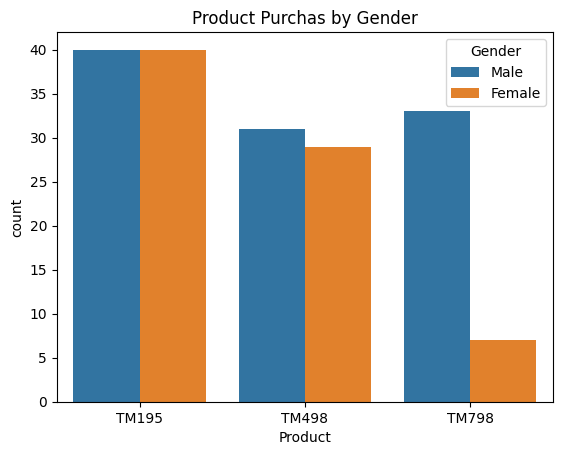

In [13]:
# Countplot for product and gender
sns.countplot(data= df, x= 'Product', hue= 'Gender')
plt.title('Product Purchas by Gender')
plt.show()

**Product Purchase by Gender Countplot**

The countplot illustrates the distribution of treadmill purchases by gender. TM195 is equally popular among males and females, each with about 40 purchases. TM498 is more popular among males (31) than females (29). TM798 shows a significant gender disparity, with males making up the majority of the purchases (33) compared to females (7). Overall, males tend to purchase more treadmills across all product lines compared to females.

In [14]:
# Pivot tables for deeper insights
print(pd.pivot_table(df, index= ['Product', 'Gender'], columns= ['MaritalStatus'], aggfunc= len))
print(pd.pivot_table(df, 'Income', index= ['Product', 'Gender'], columns= ['MaritalStatus']))

                     Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19 

**Pivot Tables**

The pivot tables provide deeper insights into the relationship between product, gender, and marital status. For TM195, partnered females have slightly higher incomes of 46,154 dollars compared to single females, 45,742 dollars, while partnered males have a significantly higher income of 50,028 dollars compared to single males, 43,266 dollars. For TM498, the income differences between partnered and single customers are less pronounced. TM798 shows a marked income disparity, with partnered females earning much more, 84,972 dollars than single females, 58,516 dollars, and partnered males also earning more 81,431 dollars compared to single males, 68,216 dollars. This indicates that higher-income individuals, particularly partnered ones, tend to purchase the more expensive TM798 treadmill.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

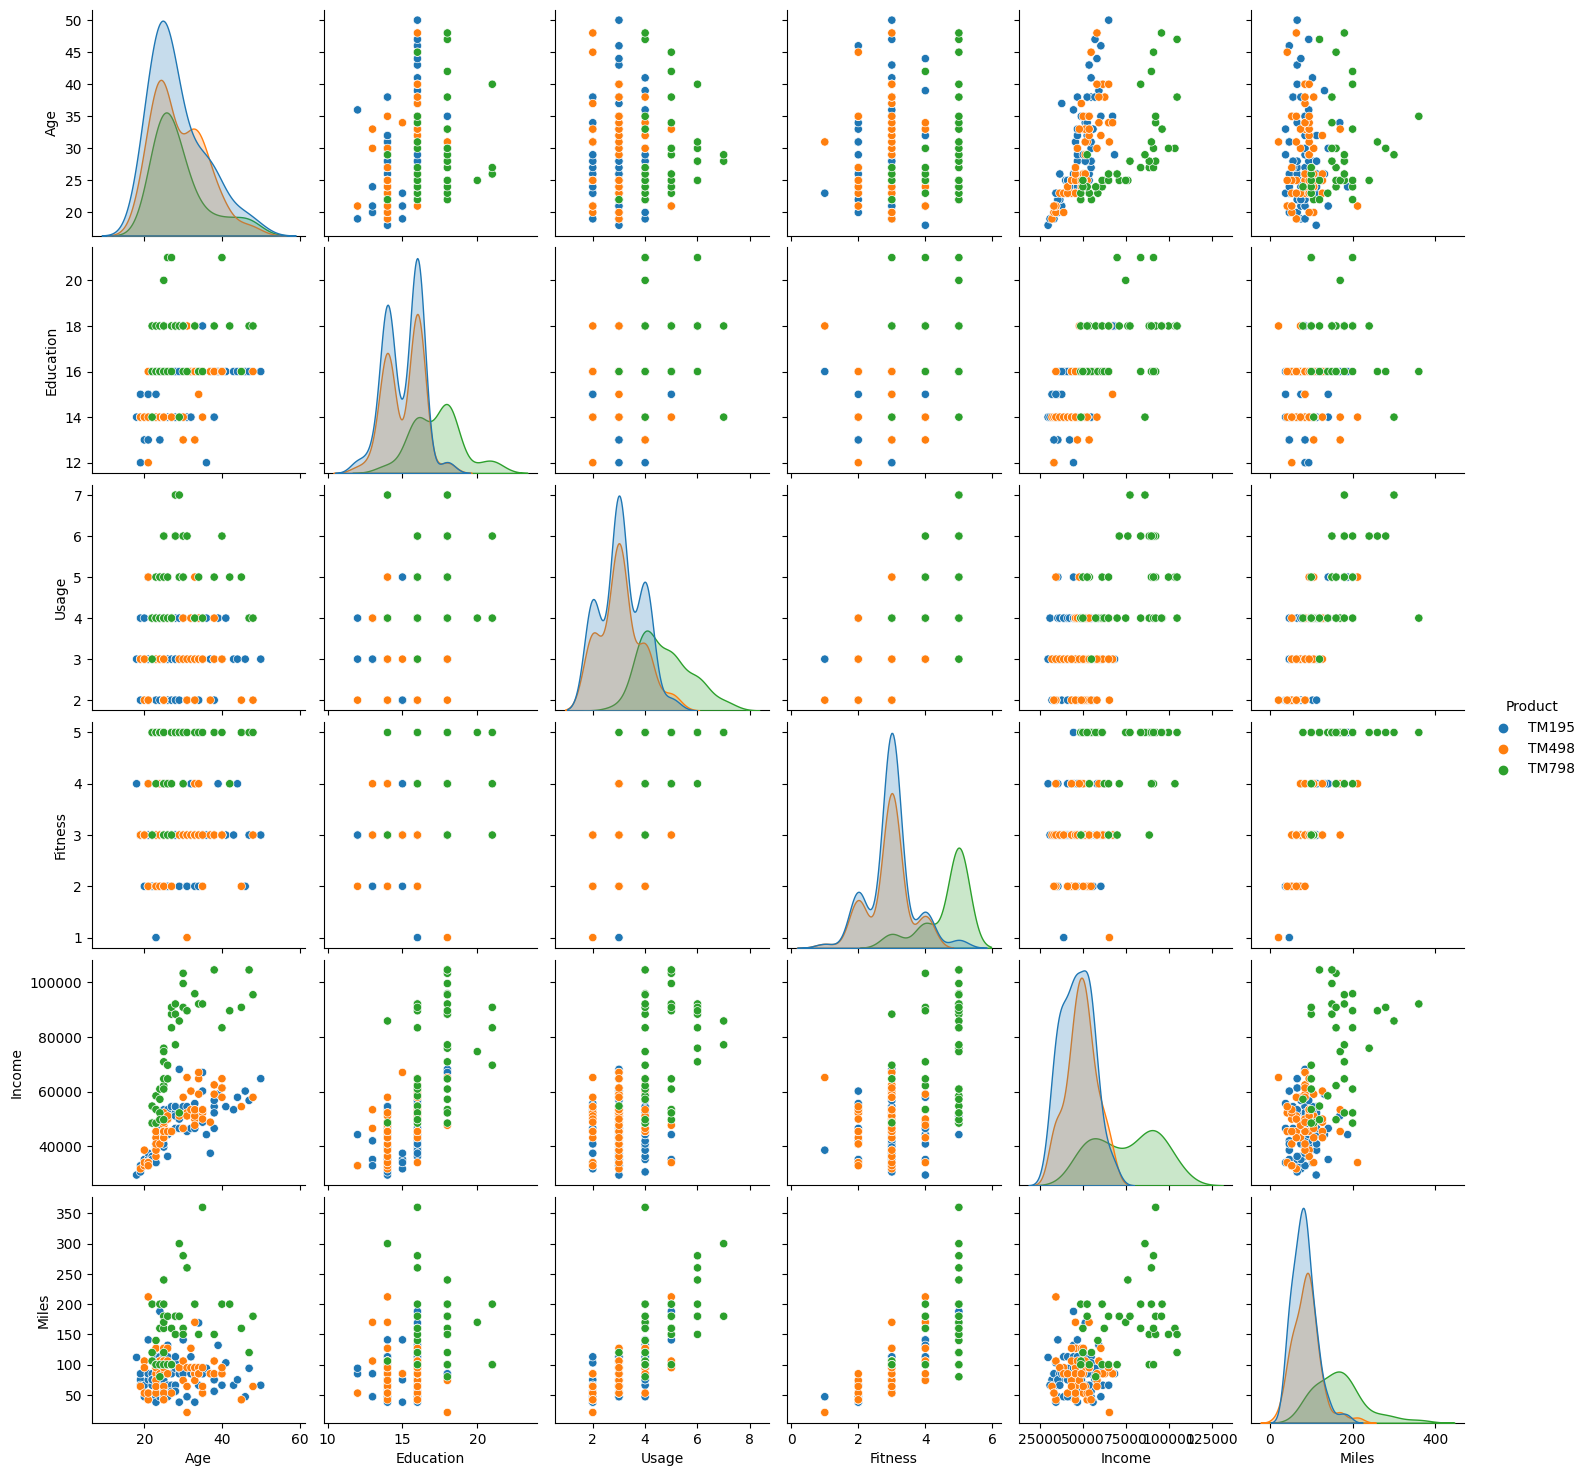

In [15]:
# Pair plot for pairwise relationships
sns.pairplot(df, hue= 'Product')
plt.show()

**Pairwise Relationships**

The pairplot displays relationships between Age, Education, Usage, Fitness, Income, and Miles for different treadmill products (TM195, TM498, TM798). The key observations here are the following:

**Age and Education**- TM798 customers tend to be younger and more educated compared to those who purchase TM195 and TM498.

**Usage and Fitness**- TM798 users generally report higher fitness levels and higher treadmill usage compared to other models.

**Income and Miles**- TM798 customers have higher incomes and expect to run more miles, indicating this model attracts more affluent and active users.

**Income and Age**- Higher income is associated with older customers, particularly for TM798 users.

**Usage and Fitness**- There is a positive correlation between usage and fitness across all products, especially for TM798.

**Miles and Usage**- Customers who use the treadmill more frequently also expect to cover more miles, with TM798 users showing higher values.

**Income Distribution**- TM798 users have higher incomes, with a noticeable separation from TM195 and TM498 users.

Overall, TM798 is favored by younger, more educated, and higher-income individuals who use the treadmill more frequently and report higher fitness levels. TM195 and TM498 are used by a broader age range with less pronounced differences in income and usage patterns. The positive correlations between fitness and usage, and between income and age, are evident across all product lines, highlighting distinct customer profiles for each treadmill model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


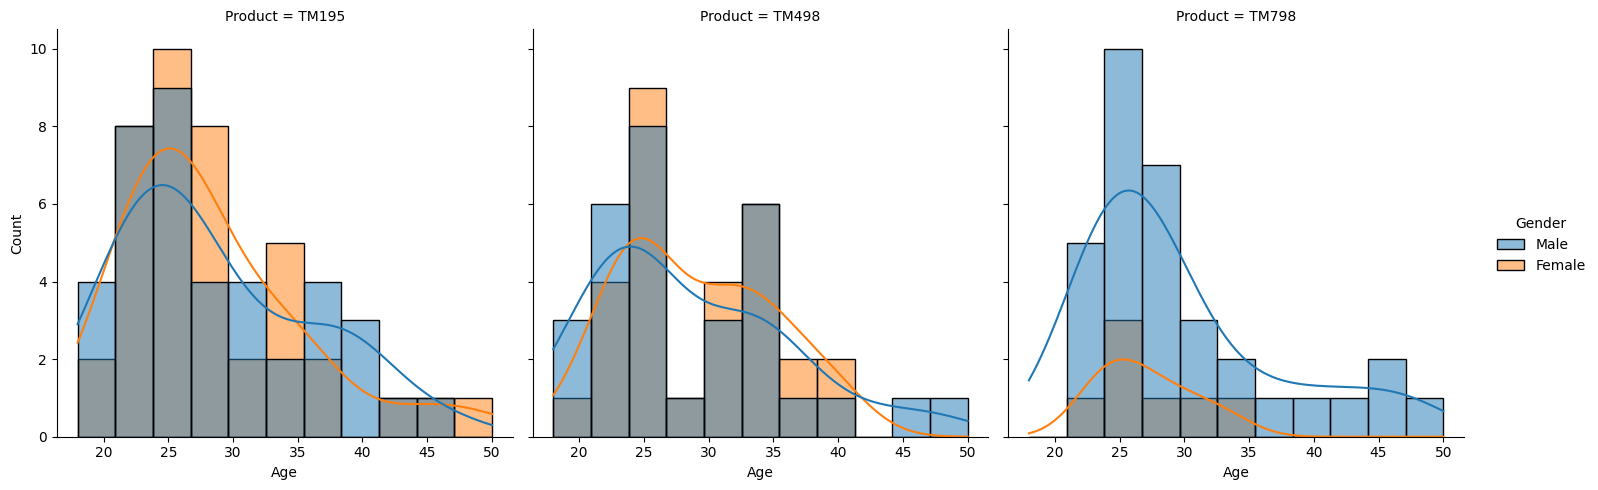

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


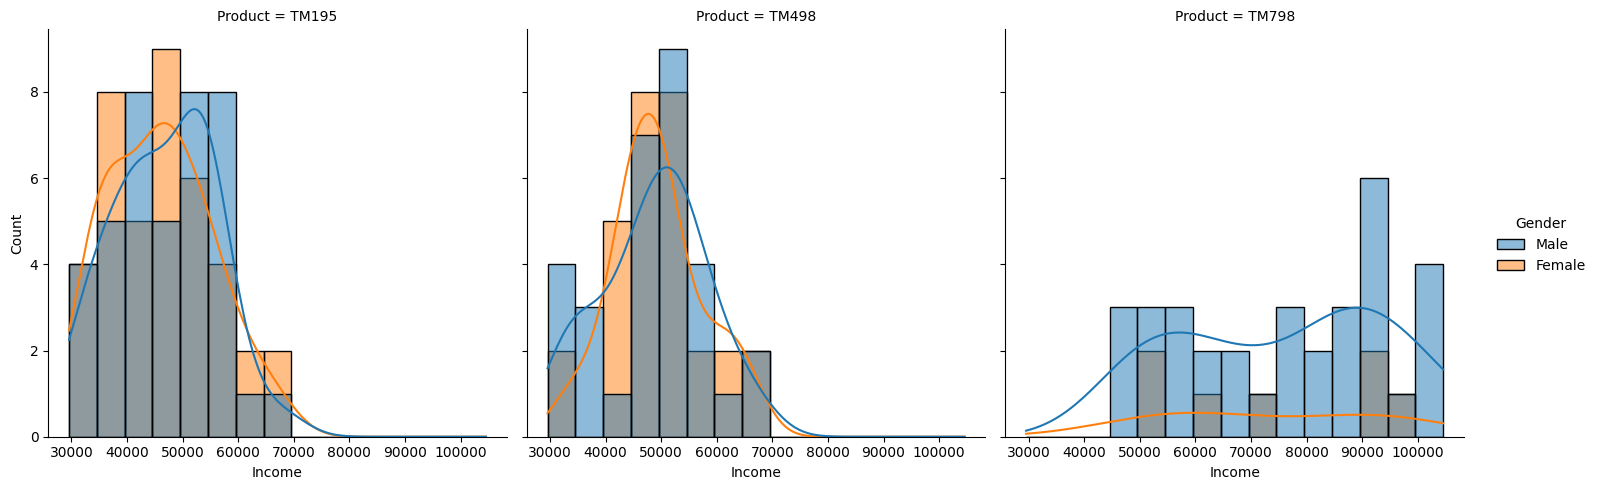

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


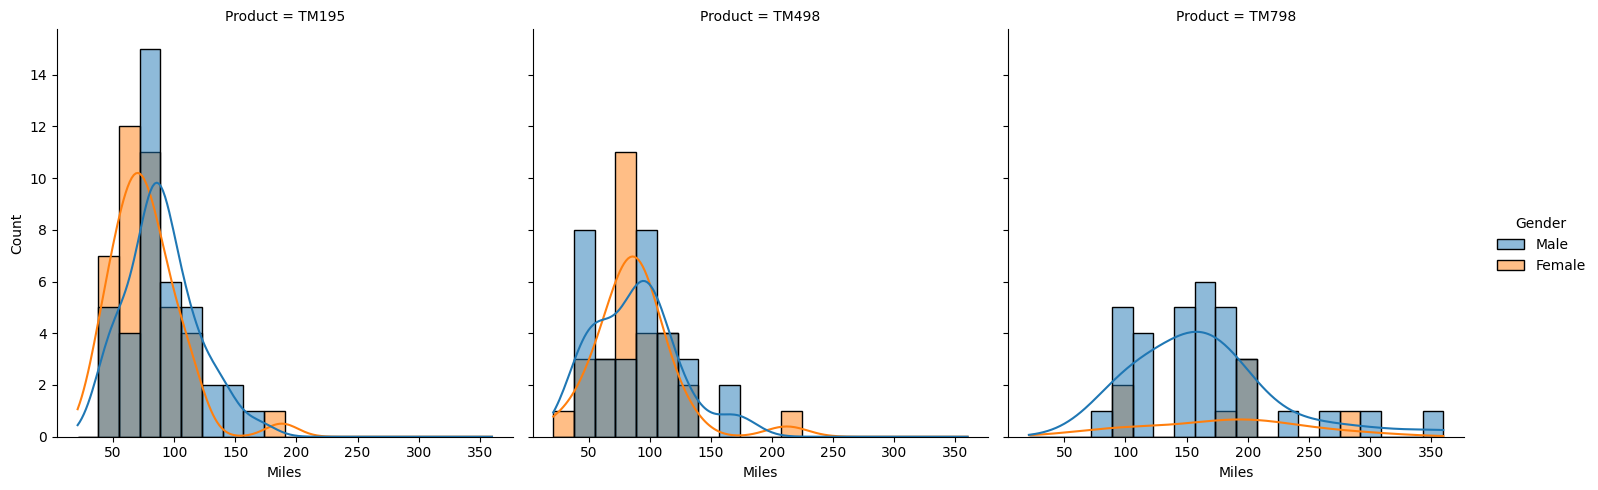

In [16]:
# Distribution plots for age, income and miles by gender and product
sns.displot(df, x= 'Age', col= 'Product', hue= 'Gender', kde= True)
plt.show()

sns.displot(df, x= 'Income', col= 'Product', hue= 'Gender', kde= True)
plt.show()

sns.displot(df, x= 'Miles', col= 'Product', hue= 'Gender', kde= True)
plt.show()

**Analysis of the Distribution Plots**

1. **Age Distribution of Product and Gender**

TM195 shows a broader age distribution for males and females, with a peak around 25-30 years. Females have a slightly higher concentration around the mid-20s.TM498 has a similar distribution to TM195 but with a more balanced gender distribution around 25-30 years.TM798 is predominantly purchased by younger males around 25 years, with fewer females across all age groups.

2. **Income Distribution by Product and Gender**

TM195 is concentrated around 45,000-55,000 dollars, with females having a higher peak in the lower income range. TM498 has a slightly higher income range around 40,000-60,000 dollars, with a more balanced distribution between genders. TM798 has a higher income distribution with most purchases around 80,000-90,000 dollars, predominantly by males.

3. **Miles Distribution by Product and Gender**

With the TM195, most customers expect to run around 50-100 miles per week, with a higher frequency for males. The TM498 has similar miles distribution with peaks around 50-100 miles, more balanced between genders. TM798 has higher expected miles, with peaks around 100-150 miles per week, predominantly by males.

In conclusion, TM195 and TM498 have similar demographic and usage patterns, with a balanced distribution between genders. TM798 is distinct, attracting younger, higher-income males who expect to use the treadmill more intensely.

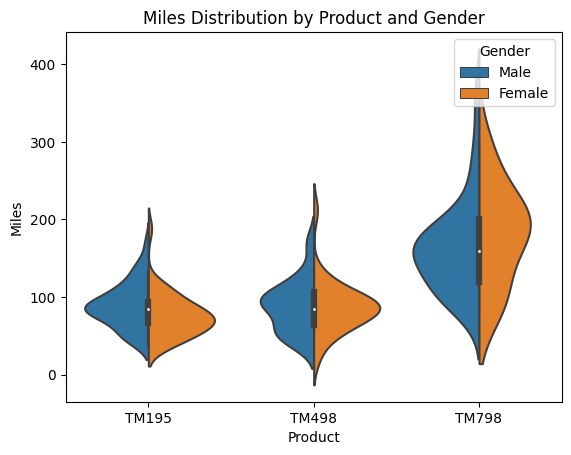

In [17]:
# Violin plots to show distribution of miles by product and gender
sns.violinplot(data= df, x= 'Product', y= 'Miles', hue= 'Gender', split= True)
plt.title('Miles Distribution by Product and Gender')
plt.show()

**Miles Distribution by Product and Gender Violin Plot**

The violin plot shows the distribution of expected weekly miles run by product and gender. For TM195 and TM498, both genders have similar distributions centered around 100 miles, with a balanced spread. TM798, however, shows a distinct pattern where males have a broader distribution with a peak around 150 miles, while females have a similar distribution but with slightly lower values. TM798 has the widest range, indicating that customers who purchase this model expect to run significantly more miles per week compared to TM195 and TM498. This suggests TM798 attracts more intensive users.

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


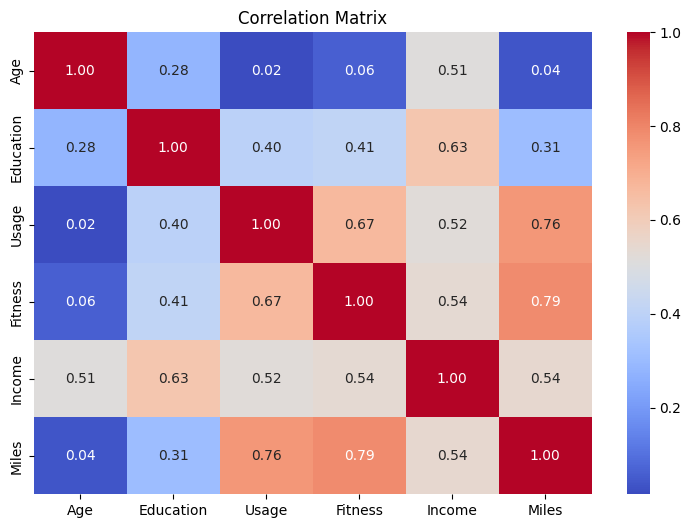

In [18]:
# Correlation matrix to understand the relationships between the numerical values
numeric_columns= ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'] # Selecting only the numeric columns
numeric_df= df[numeric_columns]

# Calculate the correlation matrix
corr_matrix= numeric_df.corr()
print(corr_matrix)

# Plot correlation matrix
plt.figure(figsize= (9,6))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix**

The correlation matrix shows the relationships between various numerical variables, where a value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. The following correlations highlight the interconnected nature of treadmill usage patterns, fitness levels, and socio-economic factors within the dataset:

**Usage and Miles**- A strong positive correlation (0.76) indicates that as treadmill usage increases, the expected miles also increase, which makes perfect sense. 

**Fitness and Miles**- A significant positive correlation (0.79) suggests that individuals who rate their fitness higher tend to expect to cover more miles.

**Income and Education**- A notable positive correlation (0.63) indicates that higher education levels are associated with higher income.

**Usage and Fitness**- A strong correlation (0.67) shows that individuals who use the treadmill more frequently tend to rate their fitness higher.

**Income and Age**- A moderate positive correlation (0.51) suggests that older individuals tend to have higher incomes.



**Linear Regression Model**

A linear regression model is a statistical technique used to understand the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. This model is particularly useful for predicting the value of the dependent variable based on the values of the independent variables. 

For this project, I aim to explore and quantify the relationships between customer demographics, fitness habits, and treadmill usage. Given the dataset's numeric features like Age, Education, Usage, Fitness, Income, and Miles, a linear regression model is well-suited to uncover patterns and make predictions. 

By applying linear regression, I can effectively identify how different factors influence the expected miles run per week, providing valuable insights for CardioGood Fitness to tailor their marketing strategies and product offerings. The simplicity, interpretability, and predictive power of the linear regression model make it an ideal choice for this analysis.

In [19]:
# Linear Regression Model- Preparing the data
X= df[['Usage', 'Fitness']]
y= df['Miles']


In [20]:
# Split the data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [21]:
# Create the model
lrm= LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict
y_pred= lrm.predict(X_test)

In [23]:
# Model evaluation
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 1355.3669962670451
R^2 Score: 0.5552271555893273


**Model Evaluation Interpretation**

The **Mean Squared Error (MSE)** measures the average squared difference between the actual and predicted values. A lower MSE indicates that the model's predictions are closer to the actual values. In this case, an MSE of 1355.37 suggests that there is some discrepancy between the predicted and actual values of the dependent variable (Miles), but the model is not excessively inaccurate.

**R^2** measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit. An R² score of 0.5552 means that approximately 55.52% of the variability in the expected miles run per week can be explained by the model's independent variables (Usage and Fitness). While this indicates a moderate level of predictive power, it also suggests that there is room for improvement, as nearly 44.48% of the variance is still unexplained by the model.

The linear regression model shows a moderate fit to the data, explaining about 55.52% of the variability in the expected miles run per week. The MSE indicates a reasonable level of prediction accuracy. To improve the model's performance, further analysis could include exploring additional variables, nonlinear relationships, or more complex modeling techniques.

In [24]:
# Statsmodels for detailed analysis
X_sm= sm.add_constant(X)
model= sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Miles   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.92e-49
Time:                        16:21:07   Log-Likelihood:                -852.31
No. Observations:                 180   AIC:                             1711.
Df Residuals:                     177   BIC:                             1720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.7429      7.856     -7.223      0.0

**OLS Regression Results Analysis**

Ordinary Least Squares (OLS) is a type of linear regression method used to estimate the parameters of a linear relationship between a dependent variable and one or more independent variables. The primary goal of OLS is to find the best-fitting line through the data points by minimizing the sum of the squares of the vertical distances (residuals) between the observed values and the predicted values. 

For this project, OLS is an appropriate choice because it helps me understand how the independent variables influence the dependent variable, Miles. The simplicity, interpretability, and predictive power of the OLS regression model make it ideal for providing actionable insights for CardioGood Fitness to tailor their marketing strategies and product offerings.

The OLS regression results indicate a strong model fit with an R-squared value of 0.716, meaning that 71.6% of the variance in the dependent variable (Miles) is explained by the independent variables (Usage and Fitness). The adjusted R-squared of 0.713 confirms the robustness of this fit. The F-statistic of 223.3 with a very low p-value (< 0.0001) demonstrates that the model is statistically significant.

The coefficients show that each additional unit of Usage is associated with an increase of approximately 20.21 miles per week, and each additional unit of Fitness is associated with an increase of approximately 27.21 miles per week, both holding other variables constant. Both Usage and Fitness have highly significant p-values (< 0.0001), indicating their strong influence on the number of miles run per week.

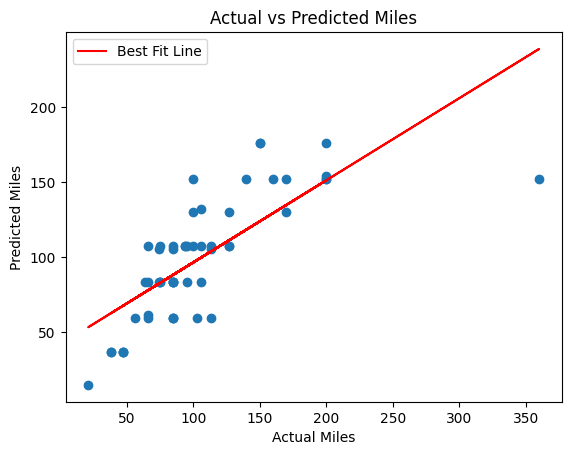

In [25]:
# Plotting the regression results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Miles')
plt.ylabel('Predicted Miles')
plt.title('Actual vs Predicted Miles')

# Best fit line
m, b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color= 'red', label= 'Best Fit Line')

plt.legend()
plt.show()

**Regression Results Scatterplot**

The scatter plot compares the actual miles run per week against the predicted miles from the linear regression model. Key observations include the alignment of many points closely along a diagonal line, indicating that the model performs well in predicting miles for a significant number of observations. However, there is some spread of data points away from the diagonal, suggesting variability in prediction accuracy, with some points deviating more significantly and indicating greater errors for these observations. A few points, especially those at higher values of actual miles, are notably distant from the diagonal line, highlighting potential outliers or cases where the model's predictive power is limited.

**Conclusion**

Throughout this project, I performed exploratory data analysis (EDA) and built a linear regression model to understand the factors influencing treadmill usage in terms of miles run per week. The key findings include that the majority of customers are young (20-35 years), moderately educated (around 16 years), and report moderate fitness levels. Higher-income individuals and those with higher self-rated fitness levels tend to expect to cover more miles. Strong correlations were found between fitness, usage, and miles run, indicating that more frequent use and better fitness levels lead to higher mileage expectations. The linear regression model explained about 71.6% of the variance in miles run per week, showing strong predictive power.

**Message to the Stakeholders**

Based on the analysis, I can provide the following insights to the stakeholders at CardioGood Fitness: 

* Focus marketing efforts on younger, moderately educated individuals who show higher fitness levels, as they are more likely to use the treadmill extensively.

* Consider features or programs tailored to enhance usage and fitness, as these factors are strongly correlated with higher treadmill mileage. 

* Further investigate the outliers and variability in usage patterns to refine product offerings and marketing strategies, ensuring they cater to diverse customer needs. 

In summary, the data reveals valuable patterns in customer demographics and usage behavior, enabling CardioGood Fitness to enhance its product offerings and marketing strategies to better meet customer needs and drive sales.